<a href="https://colab.research.google.com/github/geoUFSC/learning/blob/main/Limite_de_Liquidez_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exemplo: Limite de liquidez

Neste exemplo, vamos calcular o limite de liquidez conforme a NBR 6459.

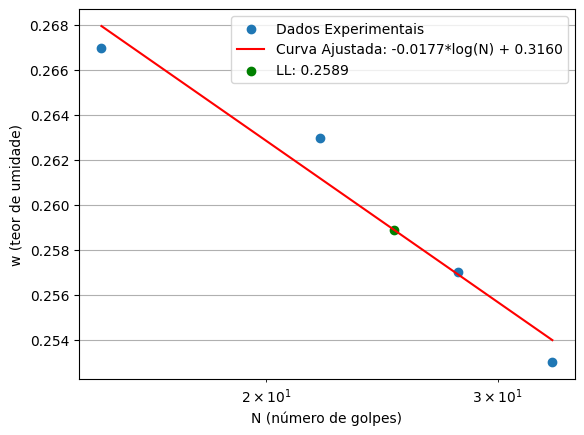

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Defina a função logarítmica
def log_function(N, a, b):
    return a * np.log(N) + b

# Valores obtidos experimentalmente
N = np.array([15, 22, 28, 33])  # Número de golpes
w = np.array([0.267, 0.263, 0.257, 0.253])  # Teor de umidade

# Parametrização da curva
params, covariance = curve_fit(log_function, N, w)
a, b = params

# Criando um conjunto de valores N para a curva ajustada
N_fit = np.linspace(min(N), max(N), 100)
w_fit = log_function(N_fit, a, b)

# Calculando o valor de w para N = 25 (Limite de Liquidez)
N_ll = 25
w_ll = log_function(N_ll, a, b)

# Plotar os dados fornecidos e a curva ajustada
plt.scatter(N, w, label="Dados Experimentais")
plt.semilogx(N_fit, w_fit, 'r', label=f"Curva Ajustada: {a:.4f}*log(N) + {b:.4f}")
plt.scatter(N_ll, w_ll, label=f"LL: {w_ll:.4f}", color='g')
plt.xlabel("N (número de golpes)")
plt.ylabel("w (teor de umidade)")
plt.legend()
plt.grid()
plt.show()


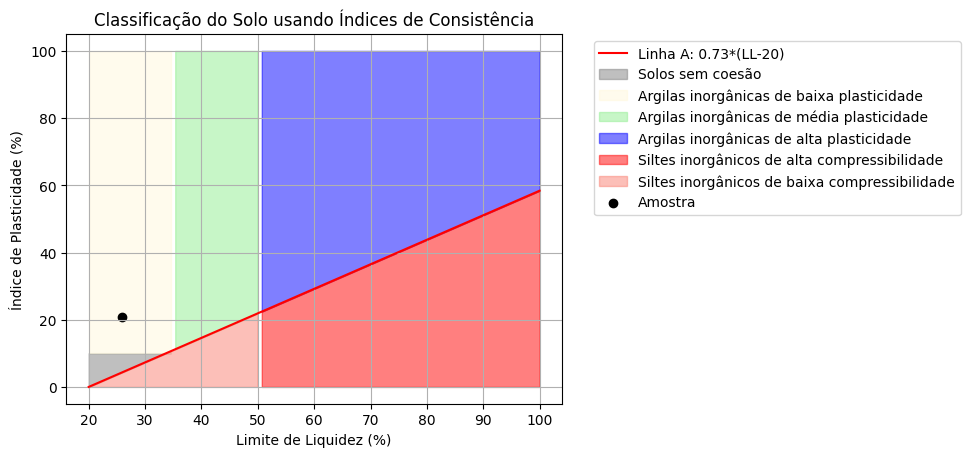

Limite de Liquidez (LL): 25.89%
Índice de Plasticidade (IP): 20.89%


In [2]:
# Para o cálculo da umidade
Mw = 1.0  # Massa da água obtida experimentalmente (g)
Ms = 20.0  # Massa do solo seco obtida experimentalmente (g)
LP = (Mw / Ms) * 100  # Limite de Plasticidade (%)

# Cálculo do Índice de Plasticidade
LL = w_ll * 100  # Limite de Liquidez em porcentagem
IP =(LL - LP)

# Definindo a linha A para o gráfico do IP vs LL
LL_range = np.linspace(20, 100, 100)  # Começa em 20 para não ter valores negativos
La = 0.73 * (LL_range - 20)

# Plotagem do gráfico do Índice de Plasticidade pelo Limite de Liquidez
plt.plot(LL_range, La, label='Linha A: 0.73*(LL-20)', color='r')

# Plotagem dos diferentes tipos de solos
plt.fill_between(LL_range, 0.73 * (LL_range - 20), 10, where=(LL_range >= 20) & (LL_range <= 35), color='gray', alpha=0.5, label='Solos sem coesão')
plt.fill_between(LL_range, 10, 100, where=(LL_range >= 20) & (LL_range <= 35), color='cornsilk', alpha=0.5, label='Argilas inorgânicas de baixa plasticidade')
plt.fill_between(LL_range, 0.73 * (LL_range - 20), 100, where=(LL_range > 35) & (LL_range <= 50), color='lightgreen', alpha=0.5, label='Argilas inorgânicas de média plasticidade')
plt.fill_between(LL_range, 0.73 * (LL_range - 20), 100, where=(LL_range > 50), color='blue', alpha=0.5, label='Argilas inorgânicas de alta plasticidade')
plt.fill_between(LL_range, 0, 0.73 * (LL_range - 20), where=(LL_range > 50), color='red', alpha=0.5, label='Siltes inorgânicos de alta compressibilidade')
plt.fill_between(LL_range, 0, 0.73 * (LL_range - 20), where=(LL_range > 0) & (LL_range <= 50), color='salmon', alpha=0.5, label='Siltes inorgânicos de baixa compressibilidade')

#Plotagem do ponto(LLxIP) que representa o tipo solos
plt.scatter(LL, IP, label=f'Amostra', color='black')

# Plotagem final do gráfico
plt.xlabel('Limite de Liquidez (%)')
plt.ylabel('Índice de Plasticidade (%)')
plt.title('Classificação do Solo usando Índices de Consistência')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid()
plt.show()

print(f'Limite de Liquidez (LL): {LL:.2f}%')
print(f'Índice de Plasticidade (IP): {IP:.2f}%')



---
---
# **PROJETO: REPOSITÓRIO PYTHON PARA GEOTECNIA**
Este notebook faz parte do projeto de extensão da **Universidade Federal de Santa Catarina** (UFSC) denominado **"Repositório Python para Geotecnia"**, cujo objetivo é desenvolver e compartilhar scripts e funções úteis para a área de geotecnia.

### Equipe 2024:
- Prof. Stephanie Thiesen* (coordenadora)
 - Bárbara Liskoski (voluntária)
 - Célio de Sousa Lopes (bolsista)
 - Leonardo Taveira de Paula (voluntário)

*Para sugestões, entre em contato pelo e-mail: `stephanie.thiesen@ufsc.br`

**Isenção de Responsabilidade:**
Os autores deste projeto não se responsabilizam por quaisquer usos indevidos, imprecisões ou danos resultantes da aplicação dos scripts e funções contidos neste repositório. O uso dos materiais é de responsabilidade exclusiva do usuário.

---
---